# Exploratory Data Analysis


## 0.1 Dataset

The LATAM airlines data is a real, public dataset that contains flight data of some scheduled flights departing from Arturo Merino Benitez International (SCL) Airport, Chile.

The dataset contains data on __68206__ flights and collects information on he following 20 variables:


| Column      | Description                                     |
|-------------|-------------------------------------------------|
| `Fecha-I`   | Scheduled date and time of the flight.          |
| `Vlo-I`     | Scheduled flight number.                        |
| `Ori-I`     | Programmed origin city code.                    |
| `Des-I`     | Programmed destination city code.               |
| `Emp-I`     | Scheduled flight airline code.                  |
| `Fecha-O`   | Date and time of flight operation.              |
| `Vlo-O`     | Flight operation number of the flight.          |
| `Ori-O`     | Operation origin city code.                     |
| `Des-O`     | Operation destination city code.                |
| `Emp-O`     | Airline code of the operated flight.            |
| `DIA`       | Day of the month of flight operation.           |
| `MES`       | Number of the month of operation of the flight. |
| `AÑO`       | Year of flight operation.                       |
| `DIANOM`    | Day of the week of flight operation.            |
| `TIPOVUELO` | Type of flight, I =International, N =National.  |
| `OPERA`     | Name of the airline that operates.              |
| `SIGLAORI`  | Name city of origin.                            |
| `SIGLADES`  | Destination city name.                          |



## 0.2. Machine Learning check-list

In this Ml project we will follow these steps:

- Get the dataset
- Understand the data, the attributes and their correlations
- Split the data into training and test set
- Apply normalisation, scaling and other transformations to the attributes if needed
- Build a machine learning model
- Evaluate the model and investigate the errors
- Tune your model to improve performance

## 0.3. Prerequisites - TODO: complete/edit

- `Pandas` for easy data uploading and manipulation.
- `Matplotlib`: for visualisations.
- `NumPy` and `SciPy`: for scietinfic programming.
- `Scikit-learn`: for machine learning algorithms.

## 1. Uploading and inspecting the data

First, upload the dataset using `Pandas` and define a function pointing to the location of the `.csv` file:

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_data(data_path):
  return pd.read_csv(data_path)
csv_path = '/content/drive/My Drive/DEPART/data.csv'
df = load_data(csv_path)

df.head()

<ipython-input-4-3e758a8faf54>:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(data_path)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


We can rename the features in order to following naming Python conventions and change the language to English, making them more understandable.

In [ ]:
df = df.rename(columns={"Fecha-I":"sched_date_time",
                          "Vlo-I":"sched_flight_num",
                          "Ori-I":"sched_OG_city_code",
                          "Des-I":"sched_destination_city_code",
                          "Emp-I":"sched_airlinecode",
                          "Fecha-O": "actual_date_time",
                          "Vlo-O":"actual_flight_num",
                          "Ori-O":"actual_OG_city_code",
                          "Des-O":"actual_destination_city_code",
                          "Emp-O":"actual_airline_code",
                          "DIA":"actual_flight_day",
                          "MES":"actual_flight_month",
                          "AÑO":"actual_flight_year",
                          "DIANOM":"dayof_week_actual_flight",
                          "TIPOVUELO":"flight_type",
                          "OPERA":"airline",
                          "SIGLAORI":"OG_city",
                          "SIGLADES":"dest_city"
                          })

We can now print the summary information about the number of instances and attributes in the dataset. Using `.info()` we can also inspect the attribute's types and number of non-null values.

The attribute types below suggest that most variables are __categorical__ (i.e. object type). ML algorithms prefer to work with numerical data, so we might want to consider casting categorical data as numerical.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   sched_date_time               68206 non-null  object
 1   sched_flight_num              68206 non-null  object
 2   sched_OG_city_code            68206 non-null  object
 3   sched_destination_city_code   68206 non-null  object
 4   sched_airlinecode             68206 non-null  object
 5   actual_date_time              68206 non-null  object
 6   actual_flight_num             68205 non-null  object
 7   actual_OG_city_code           68206 non-null  object
 8   actual_destination_city_code  68206 non-null  object
 9   actual_airline_code           68206 non-null  object
 10  actual_flight_day             68206 non-null  int64 
 11  actual_flight_month           68206 non-null  int64 
 12  actual_flight_year            68206 non-null  int64 
 13  dayof_week_actua

### Feature Engineering: Computing `delay` column

The dataset doesn't provide information about delays directly, so we must compute a new feature that indicates whether a flight was delayed or not before splitting the data into training and test set.

We must process dates and times first, as they are stored as strings. This allows us to use operators to compare dates in a meaningful way.

In [ ]:
def compute_delay(actual_date_time, sched_date_time):

  return int(actual_date_time > sched_date_time)

# Test compute_delay
# time1 = pd.to_datetime('2017-05-31 18:25:00', format = '%Y-%m-%d %H:%M:%S', errors='raise')
# time2 = pd.to_datetime('2017-05-31 18:28:00', format = '%Y-%m-%d %H:%M:%S', errors='raise')
# compute_delay(time2, time1)

We can now add a new column (feature) to the dataset to store a boolen value indicating whether the flight was delayed.

The flags indicate the following:
- __0__: the flight wasn't delayed.
- __1__: the flight __was__ delayed.

In [ ]:
df['delay'] = ''
df_copy = df.copy()

for index, row in df.iterrows():
    df_copy.at[index, 'delay'] = compute_delay(pd.to_datetime(row['actual_date_time'],
                                                              format = '%Y-%m-%d %H:%M:%S',
                                                              errors='raise'),
                                               pd.to_datetime(row['sched_date_time'],
                                                              format = '%Y-%m-%d %H:%M:%S',
                                                              errors='raise'))

df = df_copy



In [ ]:
def get_part_of_day(date_time):

    h = date_time.hour
    return (
        "morning" if 5 <= h <= 11
        else "afternoon" if 12 <= h <= 17
        else "evening" if 18 <= h <= 22
        else "night"
    )
def is_weekend(date_time):
  dayofweek = date_time.dayofweek
  return 0 if dayofweek < 5 else 1


df['sched_date_time'] = pd.to_datetime(df['sched_date_time'],
                                        format = '%Y-%m-%d %H:%M:%S',
                                        errors='raise')
df['part_of_day'] = df['sched_date_time'].apply(get_part_of_day)
df['is_weekend'] = df['sched_date_time'].apply(is_weekend)




Now we can __visualise__ the number of __delayed flights__ in our dataset.


([<matplotlib.patches.Wedge at 0x7dcbbd12e4a0>,
 [Text(-0.5515934967553773, 0.9517061596612558, '1'),
  Text(0.5515934967553775, -0.9517061596612557, '0')],
 [Text(-0.30086918004838753, 0.5191124507243213, '66.72%'),
  Text(0.3008691800483877, -0.5191124507243212, '33.28%')])

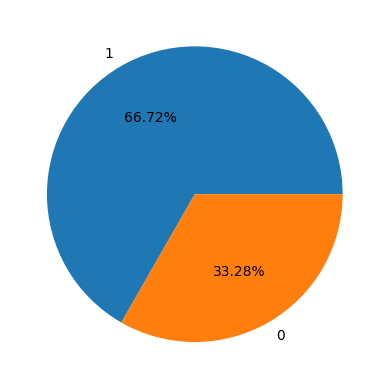

In [ ]:
plt.pie(df.delay.value_counts(),labels=df.delay.unique(),autopct = '%1.2f%%')

Here we note that the given dataset has unequal distribution of target variables, more than half of the instances correspond to delayed flights. We should try to keep this proportion when doing the train/test split.

## 3. Exploring the attributes
The next step is to look more closely into the attributes and gain insights into the data.

### Visualize the Data

- Over 50% of flights are by LAN flights, 0.001% are by LAP.
- 100% of TPU flights are delays compared to 20% of UAL flights.

Given the class imbalance, it is important to note that we will need to check when we run the model that it's able to generalize. Options for handling the imbalance include:
- Resampling
- Adding class weights in training
- Evaluate models with metrics that provide better insight for imbalanced dataa


#### Visualize Frequency of Flights per Tag



In [ ]:
sns.set(font_scale=1.0)


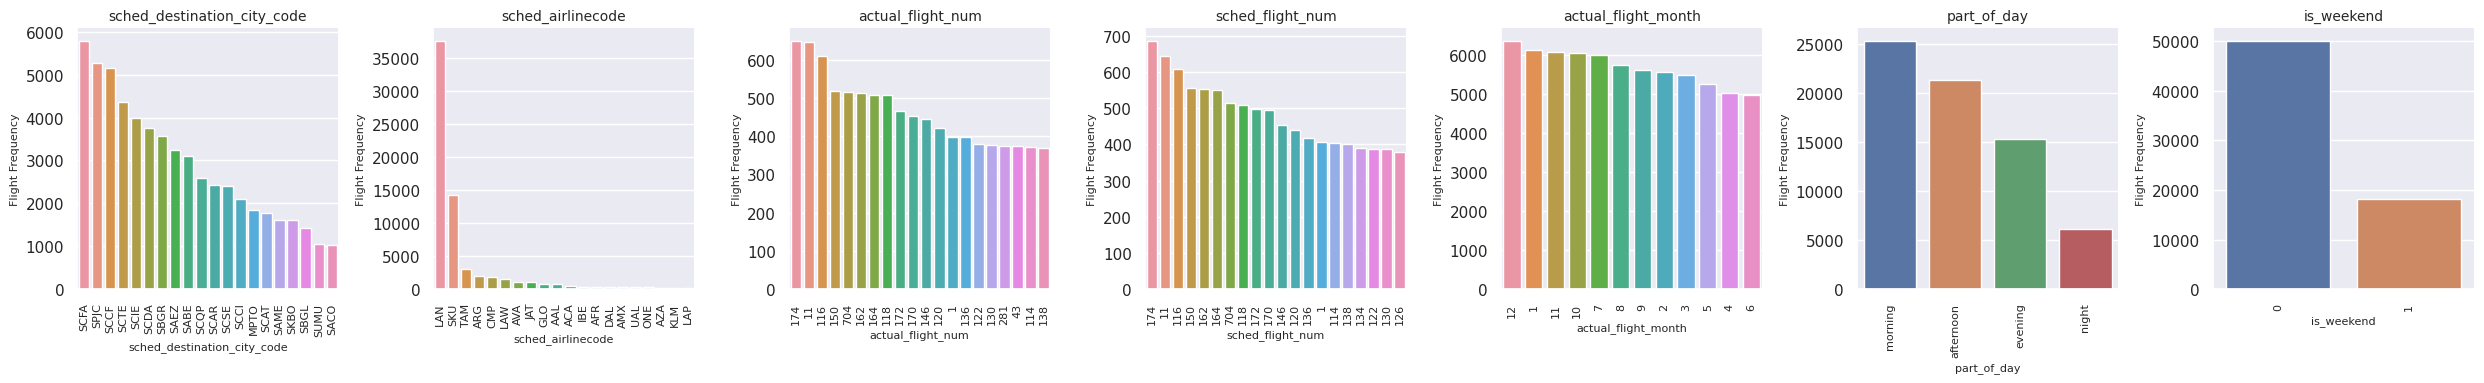

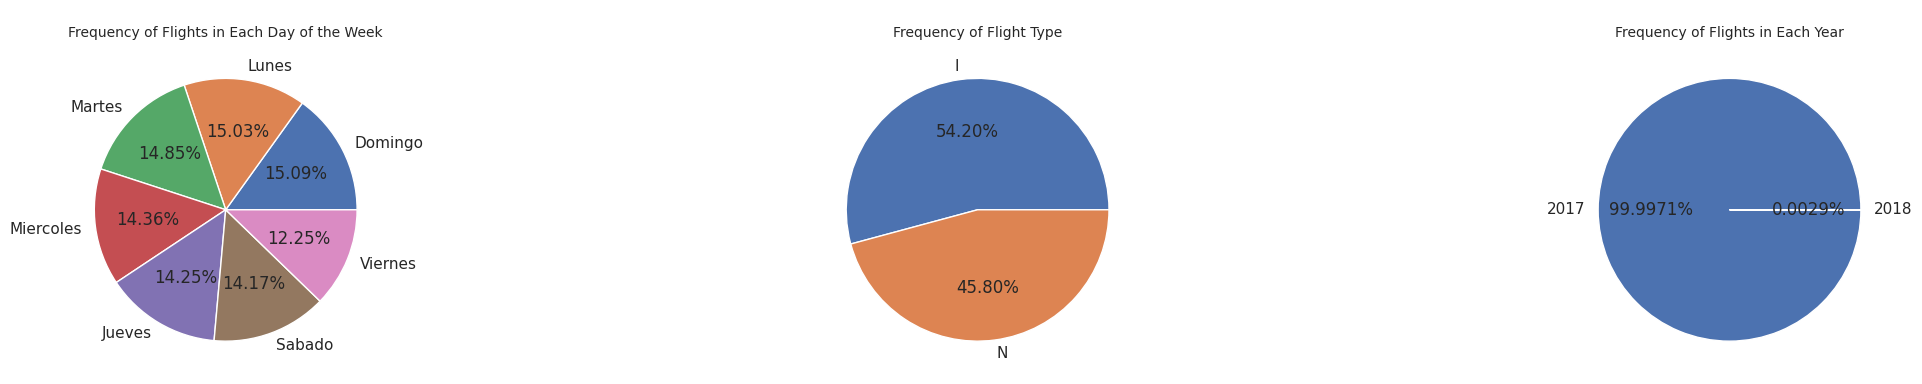

In [ ]:
import seaborn as sns

rot = 90
num_show = 20
axisfont = 8
font = 10

feat =['sched_destination_city_code', 'sched_airlinecode','actual_flight_num','sched_flight_num','actual_flight_month','part_of_day','is_weekend']

fig, axs = plt.subplots(1, len(feat), figsize=(25,4))

for i in feat:
  a = sns.countplot(ax = axs[feat.index(i)], x = df[i], order=df[i].value_counts(ascending=False).iloc[:num_show].index)
  sns.despine()
  axs[feat.index(i)].set_title(i, fontsize = font)
  axs[feat.index(i)].set_ylabel("Flight Frequency", fontsize = axisfont)
  axs[feat.index(i)].set_xlabel(i, fontsize = axisfont)
  axs[feat.index(i)].tick_params(axis='x', labelrotation = rot, labelsize = axisfont)


fig.tight_layout()


fig2, axs = plt.subplots(1, 3, figsize=(25,4))
# Flights per Day of the Week
axs[0].pie(df.dayof_week_actual_flight.value_counts(),labels=df.dayof_week_actual_flight.unique(),autopct = '%1.2f%%')
axs[0].set_title("\n""Frequency of Flights in Each Day of the Week", fontsize = font)

# Flights per Flight Type
axs[1].pie(df.flight_type.value_counts(),labels=df.flight_type.unique(),autopct = '%1.2f%%')
axs[1].set_title("\n""Frequency of Flight Type", fontsize = font)

# Flights per Year
axs[2].pie(df.actual_flight_year.value_counts(),labels=df.actual_flight_year.unique(),autopct = '%1.4f%%')
axs[2].set_title("\n""Frequency of Flights in Each Year", fontsize = font)

fig2.tight_layout()



####Visualize Frequency of Delays per Tag

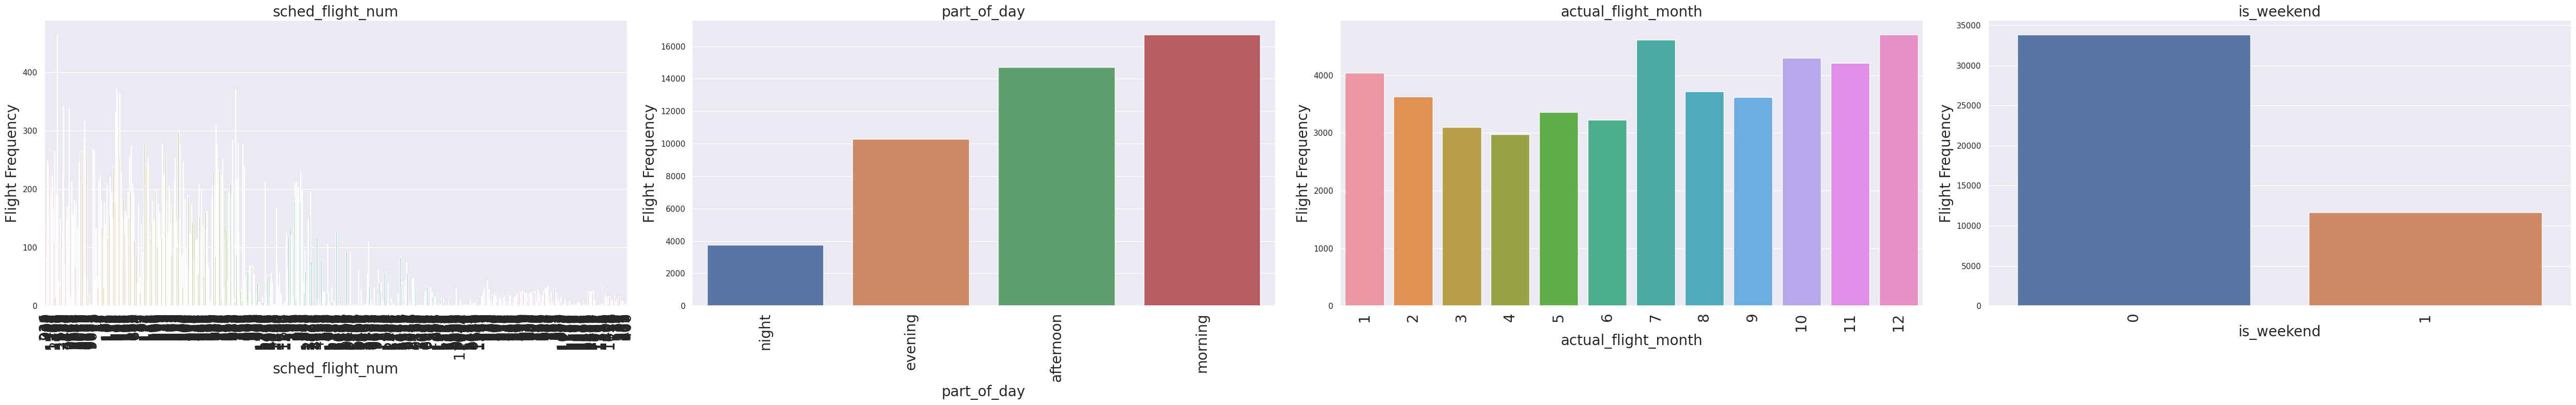

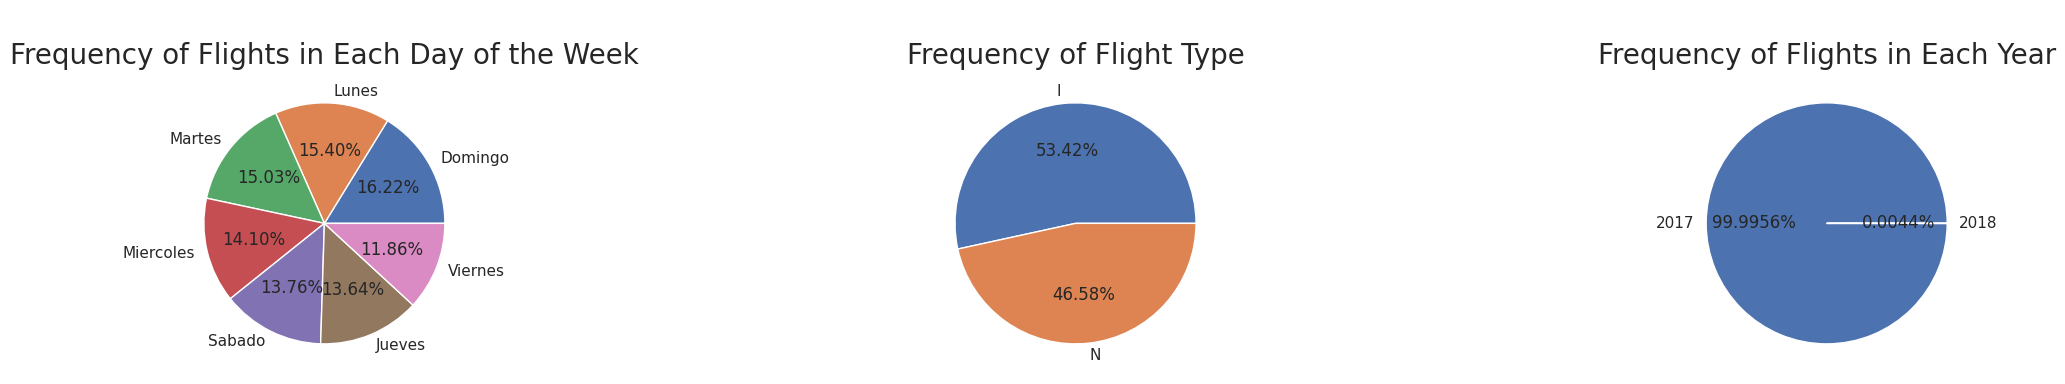

In [ ]:
delayed_df = df.drop(df[df['delay'] == 0].index)


rot = 90
num_show = 20
axisfont = 20
font = 20

feat =[ 'sched_flight_num', 'part_of_day','actual_flight_month','is_weekend']

fig, axs = plt.subplots(1, len(feat), figsize=(50,8))

for i in feat:
  sns.countplot(ax = axs[feat.index(i)], x = delayed_df[i])#, order=delayed_df[i].value_counts(ascending=False).iloc[:num_show].index)
  sns.despine()
  axs[feat.index(i)].set_title(i, fontsize = font)
  axs[feat.index(i)].set_ylabel("Flight Frequency", fontsize = axisfont)
  axs[feat.index(i)].set_xlabel(i, fontsize = axisfont)
  axs[feat.index(i)].tick_params(axis='x', labelrotation = rot, labelsize = axisfont)

fig.tight_layout()


fig2, axs = plt.subplots(1, 3, figsize=(25, 4))
# Flights per Day of the Week
axs[0].pie(delayed_df.dayof_week_actual_flight.value_counts(),labels=delayed_df.dayof_week_actual_flight.unique(),autopct = '%1.2f%%')
axs[0].set_title("\n""Frequency of Flights in Each Day of the Week", fontsize = font)

# Flights per Flight Type
axs[1].pie(delayed_df.flight_type.value_counts(),labels=delayed_df.flight_type.unique(),autopct = '%1.2f%%')
axs[1].set_title("\n""Frequency of Flight Type", fontsize = font)

# Flights per Year
axs[2].pie(delayed_df.actual_flight_year.value_counts(),labels=delayed_df.actual_flight_year.unique(),autopct = '%1.4f%%')
axs[2].set_title("\n""Frequency of Flights in Each Year", fontsize = font)

fig2.tight_layout()


####Visualize the Delays per Flight per Tag


The percentage of flights per airline that were delayed


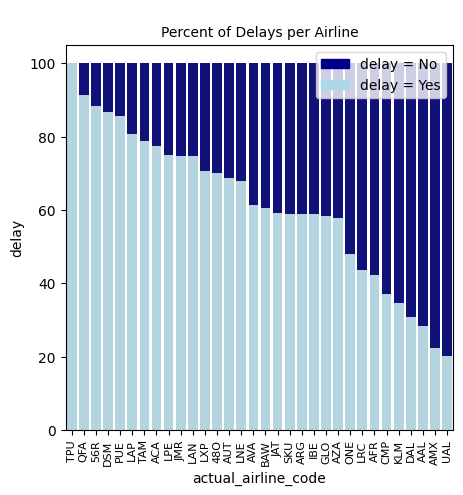

In [ ]:
num_show_percent = 50
import matplotlib.patches as mpatches


def raw_to_percentage(df, column, d):
  total = df.groupby(column)[d].count().reset_index()
  delay = df[df.delay==1].groupby(column)[d].count().reset_index()
  delay[d] = [i / j * 100 for i,j in zip(delay[d], total[d])]
  total[d] = [i / j * 100 for i,j in zip(total[d], total[d])]
  return delay, total


#Airline
# set the figure size
plt.figure(figsize=(5, 5))
#raw to percentage
airline_delay, airline_total = raw_to_percentage(df, 'actual_airline_code', 'delay')
# bar chart 1 -> top bars ('delay=No')
bar1 = sns.barplot(x="actual_airline_code",  y="delay", data=airline_total.head(num_show_percent), color='darkblue')
# bar chart 2 -> bottom bars ('delay=Yes')
bar2 = sns.barplot(x="actual_airline_code", y="delay", data=airline_delay.sort_values(by=['delay'],ascending = False).head(num_show_percent), color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='delay = No')
bottom_bar = mpatches.Patch(color='lightblue', label='delay = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.tick_params(axis='x', labelrotation = rot, labelsize = axisfont)
plt.title("\n""Percent of Delays per Airline" , fontsize = font)
# show the graph
plt.show()





Delays per Day of the Week

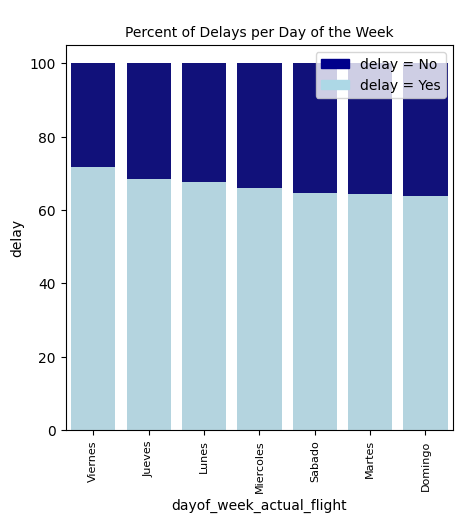

In [ ]:
#Day of the Week
# set the figure size
plt.figure(figsize=(5, 5))

day_of_week_delay, day_of_week_total = raw_to_percentage(df, 'dayof_week_actual_flight', 'delay')
# bar chart 1 -> top bars ('delay=No')
bar1 = sns.barplot(x="dayof_week_actual_flight",  y="delay", data=day_of_week_total.head(num_show_percent), color='darkblue')
# bar chart 2 -> bottom bars ('delay=Yes')
bar2 = sns.barplot(x="dayof_week_actual_flight", y="delay", data=day_of_week_delay.sort_values(by=['delay'],ascending = False).head(num_show_percent), color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='delay = No')
bottom_bar = mpatches.Patch(color='lightblue', label='delay = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.tick_params(axis='x', labelrotation = rot, labelsize = axisfont)
plt.title("\n""Percent of Delays per Day of the Week" , fontsize = font)
# show the graph
plt.show()

Delays per Month

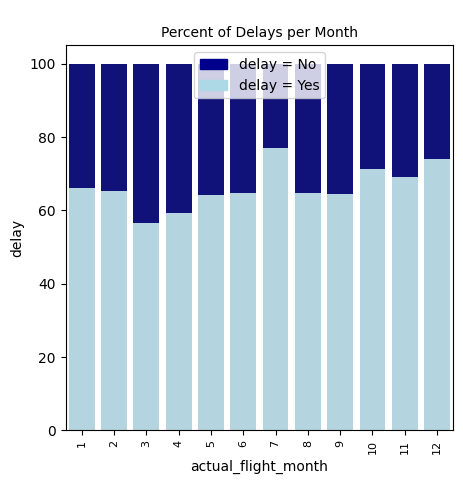

In [ ]:
#Month
# set the figure size
plt.figure(figsize=(5, 5))

month_delay, month_total = raw_to_percentage(df, 'actual_flight_month', 'delay')
# bar chart 1 -> top bars ('delay=No')
bar1 = sns.barplot(x="actual_flight_month",  y="delay", data=month_total.head(num_show_percent), color='darkblue')
# bar chart 2 -> bottom bars ('delay=Yes')
bar2 = sns.barplot(x="actual_flight_month", y="delay", data=month_delay.sort_values(by=['delay'],ascending = False).head(num_show_percent), color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='delay = No')
bottom_bar = mpatches.Patch(color='lightblue', label='delay = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.tick_params(axis='x', labelrotation = rot, labelsize = axisfont)
plt.title("\n""Percent of Delays per Month" , fontsize = font)
# show the graph
plt.show()

Part of the Day

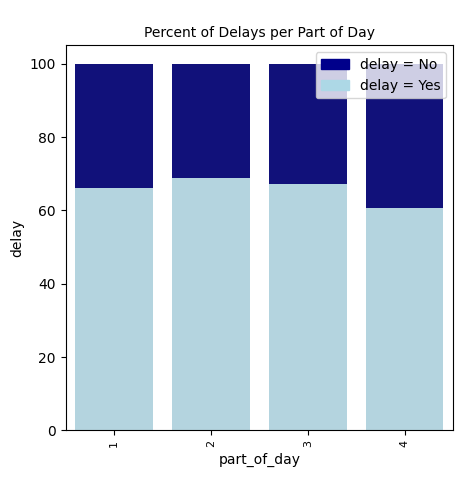

In [ ]:

#Part of the Day
# set the figure size
plt.figure(figsize=(5, 5))

day_of_week_delay, day_of_week_total = raw_to_percentage(df, 'part_of_day', 'delay')
# bar chart 1 -> top bars ('delay=No')
bar1 = sns.barplot(x="part_of_day",  y="delay", data=day_of_week_total.head(num_show_percent), color='darkblue')
# bar chart 2 -> bottom bars ('delay=Yes')
bar2 = sns.barplot(x="part_of_day", y="delay", data=day_of_week_delay.sort_values(by=['delay'],ascending = False).head(num_show_percent), color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='delay = No')
bottom_bar = mpatches.Patch(color='lightblue', label='delay = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.tick_params(axis='x', labelrotation = rot, labelsize = axisfont)
plt.title("\n""Percent of Delays per Part of Day" , fontsize = font)
# show the graph
plt.show()

### Uninformative features

It would make sense if the scheduled and actual flight number columns were the same. However, there are some instances where these values don't match. A change in flight number could indicate a delay, as airlines modify the flight numbers when changing the type of aircraft, for example.

In [ ]:
# Show and count the instances in which the flight numbers are not the same
total = 0
delay_count = 0

for index, row in df.iterrows():
  if row['sched_flight_num'] != row['actual_flight_num']:
    total += 1
    delay_count += row['delay']
    # print('sched_flight_num: ', row['sched_flight_num'], 'actual_flight_num: ', row['actual_flight_num'], 'delay: ', row['delay'])

print(f'Size of dataset: {df.shape[0]}')
print(f'Percentage of flights with different scheduled and actual flight numbers: {total/df.shape[0] * 100}')
print(f'Number of instances with different scheduled and actual flight numbers: {total}')
print(f'Percentage of delayed flights in the subset where scheduled and actual flight numbers are different: {delay_count/total * 100}')

Size of dataset: 68206
Percentage of flights with different scheduled and actual flight numbers: 2.7123713456294167
Number of instances with different scheduled and actual flight numbers: 1850
Percentage of delayed flights in the subset where scheduled and actual flight numbers are different: 78.16216216216216


The `sched_destination_city_code` and `actual_destination_city_code` variables don't always match. However, the number of instances where this happens might not be significant enough to be informative.

In [ ]:
# Show and count the instances in which the destination city codes are not the same
total = 0
delay_count = 0

for index, row in df.iterrows():
  if row['sched_destination_city_code'] != row['actual_destination_city_code']:
    total += 1
    delay_count += row['delay']
    # print('sched_destination_city_code: ', row['sched_destination_city_code'], 'actual_destination_city_code: ', row['actual_destination_city_code'], 'delay: ', row['delay'])

print(f'Size of dataset: {df.shape[0]}')
print(f'Percentage of flights with different scheduled and actual destination city codes: {total/df.shape[0] * 100}')
print(f'Number of instances with different scheduled and actual destination city codes: {total}')
print(f'Percentage of delayed flights in the subset where scheduled and actual destination city codes are different: {delay_count/total * 100}')

Size of dataset: 68206
Percentage of flights with different scheduled and actual destination city codes: 0.041052106852769554
Number of instances with different scheduled and actual destination city codes: 28
Percentage of delayed flights in the subset where scheduled and actual destination city codes are different: 78.57142857142857


As shown below, the scheduled and actual airline codes columns are not the same. These differences occur a lot more frequently than the ones shown above, so a model might be able to identify if a change in airline codes is correlated with a delay.

In [ ]:
# Show and count the instances in which the airline codes are not the same
total = 0
delay_count = 0

for index, row in df.iterrows():
  if row['sched_airlinecode'] != row['actual_airline_code']:
    total += 1
    delay_count += row['delay']
    # print('sched_airlinecode: ', row['sched_airlinecode'], 'actual_airline_code: ', row['actual_airline_code'], 'delay: ', row['delay'])

print(f'Size of dataset: {df.shape[0]}')
print(f'Percentage of flights with different scheduled and actual airline codes: {total/df.shape[0] * 100}')
print(f'Number of instances with different scheduled and actual airline codes: {total}')
print(f'Percentage of delayed flights in the subset where scheduled and actual airline codes are different: {delay_count/total * 100}')

Size of dataset: 68206
Percentage of flights with different scheduled and actual airline codes: 27.3714922440841
Number of instances with different scheduled and actual airline codes: 18669
Percentage of delayed flights in the subset where scheduled and actual airline codes are different: 71.50356205474316


#Data Preprocessing
##**Functions & Classes**:

`load_data`: loads a dataset into the notebook as a dataframe and renames the columns for better readability

`FeatureEngineering`: class that contains all steps invovled with feature engineering and dropping uninformative features
  - `reformat_date_time`: converts the format of `sched_date_time` feature to a DateTime object to make it easier to work with
  - `caluclate_delay`: calculates whether the flight was delayed and adds this as the target feature to the dataset
  - `get_part_of_day`: calculates and returns the time of day (morning, afternoon, evening, or night) using `sched_flight_time`
  - `month`: calculates the month the flight was taken
  - `is_weekend`: calculates and returns whether the flights are on a weekend (1) or not (0) using `sched_flight_time`
  - `process_add_columns`: applies the `is_weekend`, `get_part_of_day`, and
  - `month` functions to the sched_date_time feature
  - `drop_columns`: drop uninformative columns from the dataset
  
`split_dataset`: splits a dataframe into a training and testing data set with a 80/20 split, respectively.


##**Rationale**:

####Feature Engineering: `sched_flight_month`, `part_of_day`, and `is_weekend`
- As depicted in the visualizations above, the delays exhibit fluctuations based on the time of year, time of day, and day of the week. These observations indicate a likely association between these features and the likelihood of experiencing a delay.

####Dataset Splitting:
Due to the limited size of the dataset, we employed stratified sampling to mitigate any potential sampling bias. This ensures that the distribution of the target data closely mirrors the original distribution.







In [ ]:
from dataclasses import dataclass, field
from typing import Dict
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

def load_data(data_path):
  df = pd.read_csv(data_path)
  df = df.rename(columns={"Fecha-I":"sched_date_time",
                            "Vlo-I":"sched_flight_num",
                            "Ori-I":"sched_OG_city_code",
                            "Des-I":"sched_destination_city_code",
                            "Emp-I":"sched_airlinecode",
                            "Fecha-O": "actual_date_time",
                            "Vlo-O":"actual_flight_num",
                            "Ori-O":"actual_OG_city_code",
                            "Des-O":"actual_destination_city_code",
                            "Emp-O":"actual_airline_code",
                            "DIA":"actual_flight_day",
                            "MES":"actual_flight_month",
                            "AÑO":"actual_flight_year",
                            "DIANOM":"dayof_week_actual_flight",
                            "TIPOVUELO":"flight_type",
                            "OPERA":"airline",
                            "SIGLAORI":"OG_city",
                            "SIGLADES":"dest_city"
                            })
  return df

class FeatureEngineering:
  def __init__(self, prepped_df):
    self.prepped_df = prepped_df
    self.modified_df = self.prepped_df.copy()

  def reformat_date_time_flight(self):
    self.modified_df['actual_date_time'] = pd.to_datetime(self.modified_df['actual_date_time'],
                                        format = '%Y-%m-%d %H:%M:%S',
                                        errors='raise')
    self.modified_df['sched_date_time'] = pd.to_datetime(self.modified_df['sched_date_time'],
                                        format = '%Y-%m-%d %H:%M:%S',
                                        errors='raise')

  def calculate_delay(self):
    if 'delay' not in self.modified_df:
      self.reformat_date_time_flight()
      delay = self.modified_df['actual_date_time'] > self.modified_df['sched_date_time']
      self.modified_df = pd.concat([self.modified_df, delay.rename("delay")], axis=1)

  def get_part_of_day(self,date_time):
      h = date_time.hour
      return (
          1 if 5 <= h <= 11
          else 2 if 12 <= h <= 17
          else 3 if 18 <= h <= 22
          else 4
      )

  def is_weekend(self, date_time):
    dayofweek = date_time.dayofweek
    return 0 if dayofweek < 5 else 1

  def month(self,date_time):
    return date_time.month

  def process_add_columns(self):
    self.modified_df['part_of_day'] = self.modified_df['sched_date_time'].apply(self.get_part_of_day)
    self.modified_df['is_weekend'] = self.modified_df['sched_date_time'].apply(self.is_weekend)
    self.modified_df['sched_flight_month'] = self.modified_df['sched_date_time'].apply(self.month)
    self.modified_df = self.modified_df.drop('sched_date_time',axis=1)

  def drop_columns(self):
    actual_drop = ["actual_date_time","actual_flight_num","sched_flight_num", "actual_OG_city_code",
                    "actual_destination_city_code","actual_airline_code","actual_flight_day",
                    "actual_flight_month","actual_flight_year","dayof_week_actual_flight",
                    ]
    features2_drop = ["sched_OG_city_code","dest_city","airline","OG_city"]
    self.modified_df=self.modified_df.drop(actual_drop,axis=1)
    self.modified_df=self.modified_df.drop(features2_drop,axis=1)

class SplitDataset:
  def __init__(self, df, n_splits = 1, test_size = 0.2, random_state = 42):
      self.df = df
      self.n_splits = n_splits
      self.test_size = test_size
      self.random_state = random_state

  def split_data(self):
    split = StratifiedShuffleSplit(n_splits = self.n_splits, test_size = self.test_size, random_state=self.random_state)
    for train_index, test_index in split.split(self.df, self.df["delay"]):
        strat_train_set = self.df.iloc[train_index]
        strat_test_set = self.df.iloc[test_index]

    train_labels = strat_train_set['delay'].copy()
    train_labels = train_labels.astype('int')
    train_data = strat_train_set.drop('delay', axis=1)

    test_labels = strat_test_set['delay'].copy()
    test_labels = test_labels.astype('int')
    test_data = strat_test_set.drop('delay', axis=1)
    return train_data,train_labels,test_data,test_labels




###Implement Data Processing

In [ ]:
csv_path = '/content/drive/My Drive/DEPART/data.csv'
prepped_df = load_data(csv_path) #loading the data
feature_eng = FeatureEngineering(prepped_df) #set up feature engineering class
feature_eng.reformat_date_time_flight() #reformat the datetime object
feature_eng.calculate_delay() #calcualte the target variable
feature_eng.process_add_columns() #add columns
feature_eng.drop_columns() #drop columns
final_dataset = feature_eng.modified_df

split = SplitDataset(final_dataset)
train_data,train_labels,test_data,test_labels = split.split_data()

<ipython-input-3-2c2ffbc88e61>:7: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


#Model Training and Evaluation

##Define Model Settings

3 binary probabilistic classifier models were setup to test a range of parameters:
- Bernoulli Naive Bayesian
- XGBoosting
- Logistic Regression

**Bernoulli Naive Bayesian:** Calculates the likelihood of a datapoint belonging to each class based on the presence or absense of binary features.
- *A grid-search was not performed on Bernoulli NB as it has no parameters to grid-search over.

**XGBoosting:** Builds a sequence of decision trees, progressively refining its  accuracy. The final prediction is derived by combining the outcomes of all the trees through majority voting.

**Logistic Regression:** Applies a signmoid function to the input features. The data point is then assigned to the class with the highest proabability.

A 3 fold grid-search was also included on XGB and Logistic Regression to determine the best parameters.



In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


#### Logistic Regression Grid Search ####
lr_param_grid = dict({'solver': ['liblinear','sag', 'lbfgs','newton-cholesky'],
                   'max_iter' : [1000, 10000],
                   'C':  np.logspace(-2, 2, 3)
                    })

logreg = LogisticRegression(
    penalty = 'l2',
    C = 1,
    solver='liblinear',
    max_iter=100)


# Define grid search object.
grid_logreg = RandomizedSearchCV(logreg,
                       lr_param_grid,          # Parameter grid
                       cv = 3,              # Number of CV folds.
                       scoring = 'neg_log_loss', # Rank outputs.
                       n_jobs = -1,          # Parallel jobs. -1 is "all you have"
                       verbose = 1
                      )


### XGB Grid Search ###
# Create the parameter search grid
XGB_param_grid = dict({'n_estimators': [50, 100, 200],
                   'max_depth': [3, 5, 10],
                   'learning_rate' : [0.05, 0.1, 0.3],
                   'gamma': [0.5, 0.9, 0.1, 0.001],
                   'subsample': [0.6, 0.63, 0.64],
                   'reg_lambda': [0, 0.5, 1, 2],
                  })

# Define the XGB model
XGB = XGBClassifier(
    max_depth=3,                   # Depth of each tree
    learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
    n_estimators=5,               # How many trees to use, the more the better, but decrease learning rate if many used.
    verbosity=1,                  # If to show more errors or not.
    objective='binary:logistic',  # Type of target variable.
    booster='gbtree',             # What to boost. Trees in this case.
    n_jobs=2,                     # Parallel jobs to run. Set your processor number.
    gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
    subsample=0.632,              # Subsample ratio. Can set lower
    colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
    colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
    colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
    reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
    reg_lambda=0,                 # Regularizer for first fit.
    scale_pos_weight=1,           # Balancing of positive and negative weights.
    base_score=0.5,               # Global bias. Set to average of the target rate.
    random_state=20212004,        # Seed
    missing=1,                    # How are nulls encoded?
    use_label_encoder=False,      # Eliminates warning
    )

# Define grid search object.
Grid_XGB = RandomizedSearchCV(XGB,             # Original XGB.
                       XGB_param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.
                       scoring = 'neg_log_loss', # How to rank outputs.
                       n_jobs = -1,         # Parallel jobs. -1 is "all you have"
                       refit = True,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1
                      )




### BNB Grid Search ###
bouNB = BernoulliNB()





###One-Hot Encoding Categorical Data


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
transformer = ColumnTransformer(transformers=[
    ('tnf2',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),['sched_destination_city_code','sched_airlinecode', 'flight_type'])
],remainder='passthrough')

###Building the Pipelines

In [ ]:
BNBpipeline = Pipeline([
    ('one_hot', transformer),
    ('BNB', bouNB)
    ])

XGBClassifierpipeline = Pipeline([
    ('one_hot', transformer),
    ('XGB', Grid_XGB)
    ])

logreg_pipeline = Pipeline([
    ('one_hot', transformer),
    ('logreg', grid_logreg)
])

## Model Evaluation
###**Metrics**:

- **Balanced Accuracy**: A metric that gives equal weight to both classes (delayed or not delayed) when measuring accuracy,  it calculates the mean of sensitivity (true positive rate) and specificity (true negative rate).
- **F1 Score**: A metric that measures the balance of a model's precision and recall,  i.e., the balance between correctly predicting delays and avoiding false alarms.
- **AUC**: A metric that quantifies the model's ability to distinguish between classes.
-**Log Loss**: A metric that measures the difference between the predicted probabilities and the true class label (lower is better)
- **Brier**: A metric that assess the mean square distance between the probability and the actual target data (lower is better).

- **Confusion Matrix**: Provides a detailed visual breakdown of model performance for each class.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, make_scorer, confusion_matrix, roc_curve, auc, balanced_accuracy_score, f1_score, roc_auc_score, log_loss, brier_score_loss

def model_train_and_eval(train_data, train_labels, test_data, test_labels, model):
  pred_test_labels = model.fit(train_data, train_labels).predict(test_data)
  pred_proba = model.fit(train_data,train_labels).predict_proba(test_data)[:,1]


  balanced_accuracy = balanced_accuracy_score(pred_test_labels, test_labels)
  f1 = f1_score(pred_test_labels, test_labels, average="weighted")
  auc = np.round(roc_auc_score(y_true = test_labels, y_score = pred_proba), decimals = 3)
  cm = confusion_matrix(test_labels, pred_test_labels)
  logg_loss = log_loss(test_labels, pred_proba)
  brier = brier_score_loss(test_labels, pred_proba)

  return (balanced_accuracy, f1, auc, cm, logg_loss, brier)


##Train and Evaluate the Three Models

In [ ]:
logreg_accuracy, logreg_f1, logreg_auc, logreg_cm, logreg_log_loss, logreg_brier  = model_train_and_eval(train_data, train_labels, test_data, test_labels, logreg_pipeline)
XGB_accuracy, XGB_f1, XGB_auc, XGB_cm, XGB_log_loss, XGB_brier = model_train_and_eval(train_data, train_labels, test_data, test_labels, XGBClassifierpipeline)
BNB_accuracy, BNB_f1, BNB_auc, BNB_cm, BNB_log_loss, BNB_brier  = model_train_and_eval(train_data, train_labels, test_data, test_labels, BNBpipeline)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


###Performance Metrics for Each Model:



In [ ]:
from tabulate import tabulate

df = pd.DataFrame({
    'Model':['Logistic Regression','XGBoost','Bernoulli Naive Bayes'],
    'Balanced accuracy': [logreg_accuracy, XGB_accuracy, BNB_accuracy],
    'f1 score': [logreg_f1, XGB_f1, BNB_f1],
    'AUC score': [logreg_auc, XGB_auc, BNB_auc],
    'Log Loss': [logreg_log_loss, XGB_log_loss, BNB_log_loss],
    'Brier score loss': [logreg_brier, XGB_brier, BNB_brier]
})

df.set_index('Model')

print(tabulate(df, headers='keys', tablefmt='psql',showindex=False))


+-----------------------+---------------------+------------+-------------+------------+--------------------+
| Model                 |   Balanced accuracy |   f1 score |   AUC score |   Log Loss |   Brier score loss |
|-----------------------+---------------------+------------+-------------+------------+--------------------|
| Logistic Regression   |            0.656605 |   0.748838 |       0.668 |   0.595083 |           0.203891 |
| XGBoost               |            0.667778 |   0.736245 |       0.707 |   0.573593 |           0.194942 |
| Bernoulli Naive Bayes |            0.618932 |   0.714964 |       0.657 |   0.612462 |           0.209767 |
+-----------------------+---------------------+------------+-------------+------------+--------------------+


###Plotting the Confusion Matrices:


Text(0.5, 1.0, 'Confusion matrix - Bernoulli Naive Bayes')

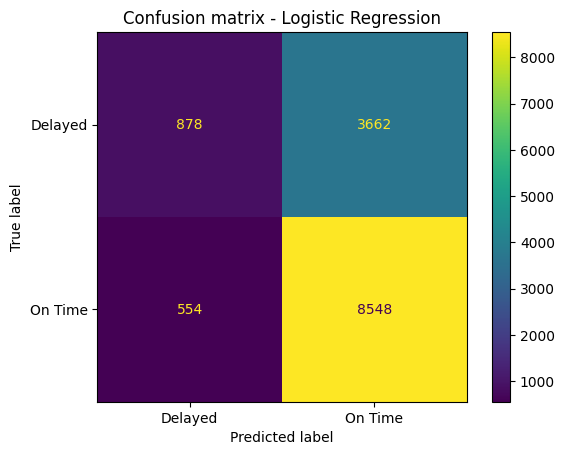

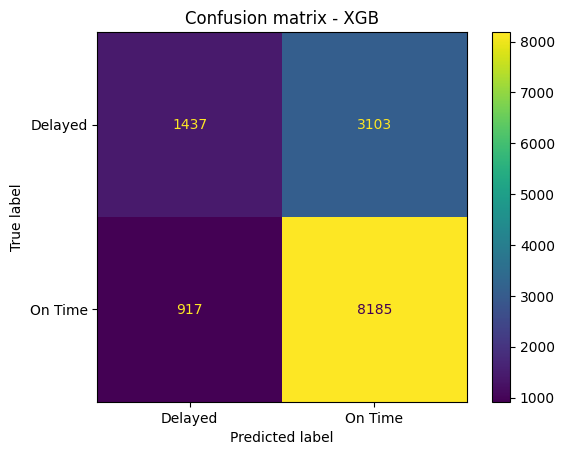

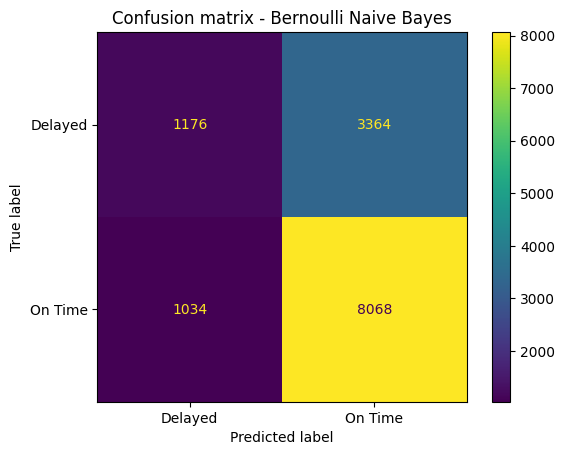

In [ ]:
logreg_disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=["Delayed", "On Time"])
logreg_disp.plot();
logreg_disp.ax_.set_title('Confusion matrix - Logistic Regression')

XGBdisp = ConfusionMatrixDisplay(confusion_matrix=XGB_cm, display_labels=["Delayed", "On Time"])
XGBdisp.plot();
XGBdisp.ax_.set_title('Confusion matrix - XGB')

BNBdisp = ConfusionMatrixDisplay(confusion_matrix=BNB_cm, display_labels=["Delayed", "On Time"])
BNBdisp.plot();
BNBdisp.ax_.set_title('Confusion matrix - Bernoulli Naive Bayes')

###Best Parameters from the Grid Search

In [ ]:
print("Best XGB Parameters: ", XGBClassifierpipeline['XGB'].best_params_)
print("XGB CV Score: ", XGBClassifierpipeline['XGB'].best_score_ , end = "\n \n")
print("Best Logistic Regression Parameters: " , logreg_pipeline['logreg'].best_params_ )
print("Logistic Regression CV Score: ", logreg_pipeline['logreg'].best_score_)


Best XGB Parameters:  {'subsample': 0.63, 'reg_lambda': 2, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.5}
XGB CV Score:  -0.5742529660496504
 
Best Logistic Regression Parameters:  {'solver': 'lbfgs', 'max_iter': 5000, 'C': 100.0}
Logistic Regression CV Score:  -0.5949959321071274


#Model Selection Summary - XGBoost

The XGBoost model with the following parameters was selected:
- subsample: 0.63
- reg_lambda: 2
- n_estimators: 200
- max_depth: 5
- learning_rate: 1
- gamma: 0.5

This model exhibited top-tier performance across all metrics, with the exception of the F1 score. This exception suggests that, unlike Logistic Regression, the model may be less effective at attaining the optimal balance between minimizing false alarms (false positives) and missed delays (false negatives). This tendency can be seen in the confusion matrix, notably in the top right (false negatives) and bottom left (false positives) categories, where the XGBoost model had slightly higher values. Furthermore, at 0.01 points, the difference between the highest F1 score and the XGBoost F1 score is relatively modest.
As a result, the XGBoost model was chosen because it performed well in all other parameters.






